In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('..\datasets\EV-market-size\Electric_Vehicle_population_Data.csv')
#https://statso.io/market-size-of-evs-case-study/

In [6]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
data.dropna()

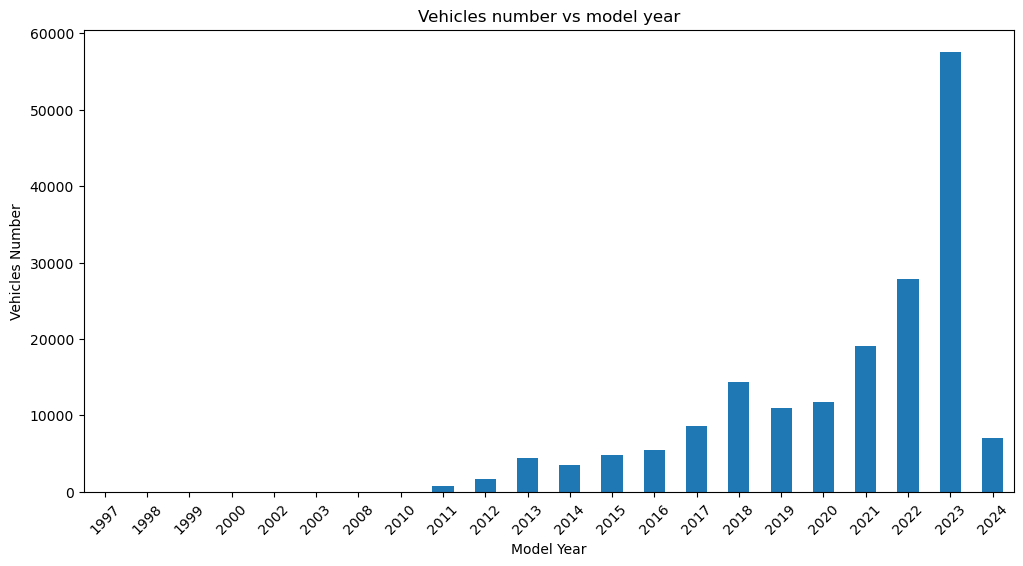

In [21]:
plt.figure(figsize=(12,6))
by_year=data.groupby('Model Year')['VIN (1-10)'].count().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Model Year')
plt.ylabel('Vehicles Number')
plt.title('Vehicles number vs model year')
plt.show()

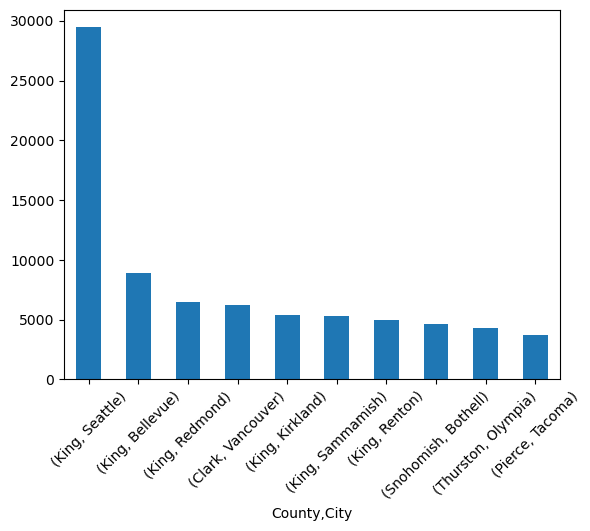

In [46]:
by_city=data.groupby(['County','City'])['VIN (1-10)'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

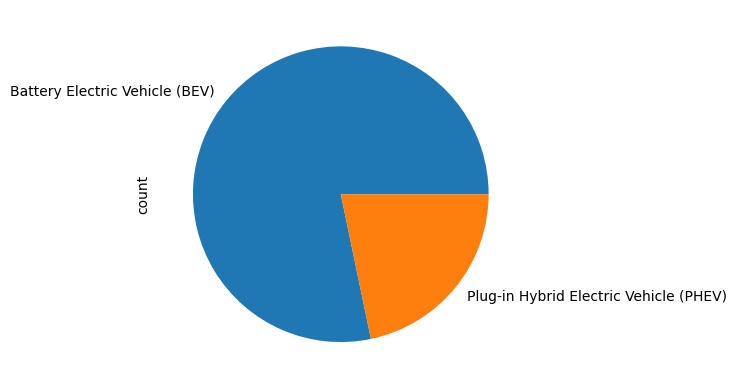

In [57]:
#e_types=list(data['Electric Vehicle Type'].unique())
data['Electric Vehicle Type'].value_counts().plot(kind='pie')
plt.show()

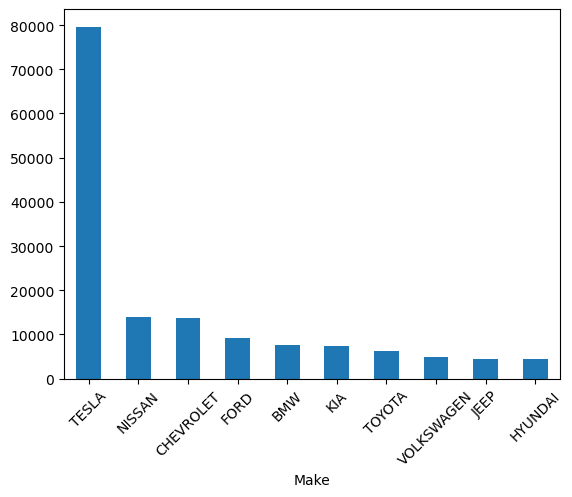

In [71]:
data['Make'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [88]:
top3_make=data['Make'].value_counts().head(3).index
top3_df=data[data['Make'].isin(top3_make)]

<Axes: xlabel='Model'>

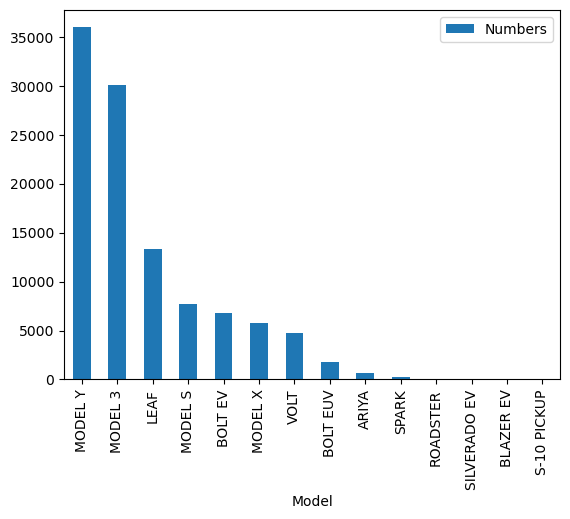

In [120]:
top3_df.groupby(['Make','Model']).count()['VIN (1-10)'].sort_values(ascending=False).reset_index(name='Numbers').plot(kind='bar',x='Model',y='Numbers')

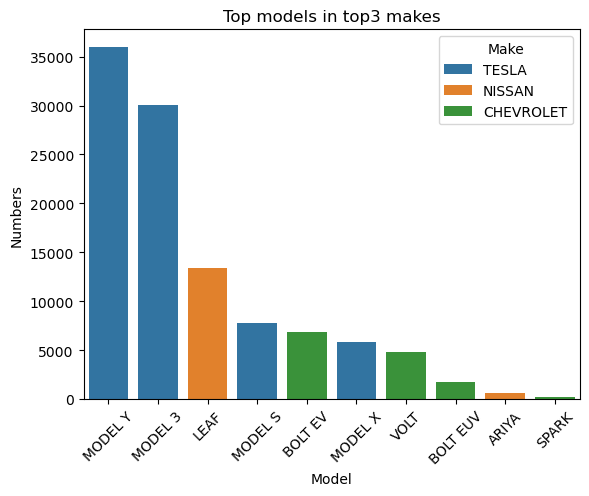

In [136]:
top3=top3_df.groupby(['Make','Model']).count()['VIN (1-10)'].sort_values(ascending=False).reset_index(name='Numbers').head(10)
sns.barplot(top3,x='Model',y='Numbers',hue='Make',dodge=False)
plt.xticks(rotation=45)
plt.title('Top models in top3 makes')
plt.show()

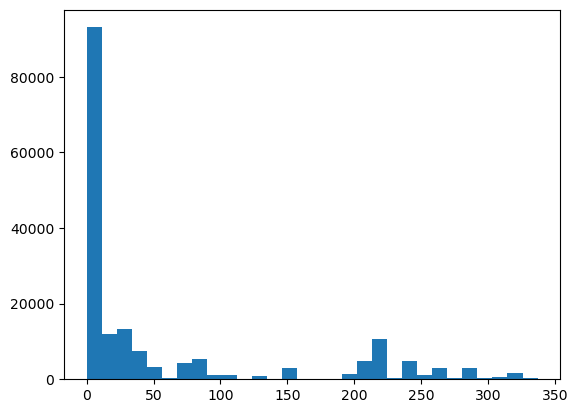

In [143]:
plt.hist(data['Electric Range'],bins=30)
plt.show()

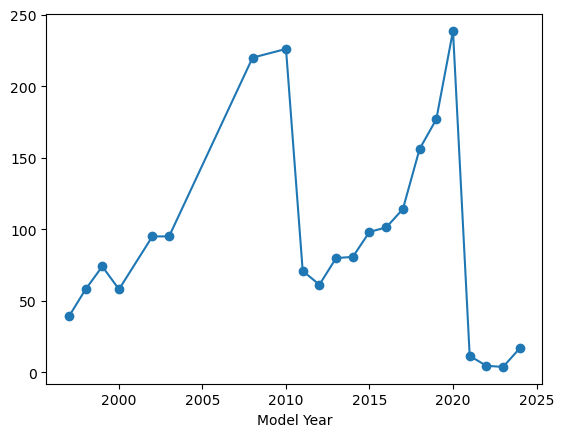

In [155]:
year_range=data.groupby('Model Year')['Electric Range'].mean().plot(style='o-')

In [159]:
v_counts=data['Model Year'].value_counts().sort_index()

<Axes: xlabel='Model Year'>

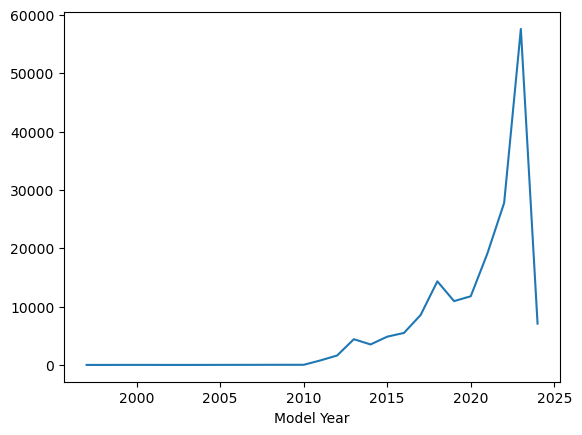

In [161]:
v_counts.plot()

In [163]:
from scipy.optimize import curve_fit
import numpy as np

In [165]:
v_counts=v_counts[v_counts.index<=2023]

In [171]:
def exp_growth(x,a,b):
    return a*np.exp(b*x)
x_data=v_counts.index-v_counts.index.min()
y_data=v_counts.values

In [172]:
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [175]:
forecast_years = np.arange(2024, 2024 + 6) - v_counts.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted = dict(zip(forecast_years + v_counts.index.min(), forecasted_values))

print(forecasted)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


In [182]:
years=np.arange(v_counts.index.min(),2030)
actual_years=v_counts.index
actual_values=v_counts.values
forecast_years=np.arange(v_counts.index.max()+1,v_counts.index.max()+6)
forecast_values=exp_growth(forecast_years-v_counts.index.min(),*params)

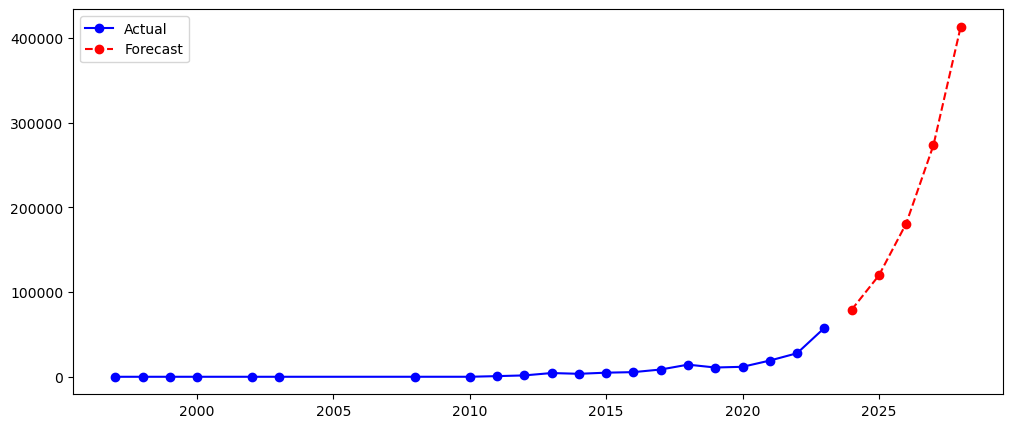

In [212]:
plt.figure(figsize=(12,5))
plt.plot(actual_years,actual_values,'bo-',label='Actual')
plt.plot(forecast_years,forecast_values,'ro--',label='Forecast')
plt.legend()
plt.show()